In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

In [3]:
def UnitSample(n, k):
    N = np.zeros(n)
    K = (np.random.random(k) * n).astype(int)
    for i in K:
        N[i]+=1
    
    if(len(N) == 1):
        return N[0]*N[0]
    elif(len(N) == 2):
        return (N[0] + N[1])*(N[0] + N[1])
    
    A = 0
    A += (N[0] + N[1]) * (N[0] + N[1])
    A += (N[len(N)-2] + N[len(N)-1]) * (N[len(N)-2] + N[len(N)-1])
    
    
    for i in range(1, len(N)-1):
        B = N[i-1] + N[i] + N[i+1]
        A+=B*B
    
    
    return A

In [4]:
def UnitSampleOptimized(n, k):
    N = np.zeros(n)
    K = (np.random.random(k) * n).astype(int)
    for i in K:
        N[i]+=1
    
    if(len(N) == 1):
        return N[0]*(N[0]-1)
    
    A = 0
    for i in range(0, len(N)-1):
        B = N[i] + N[i+1]
        A+=B*(B-1)
    
    return A

In [5]:
def SamplerOpt(n, k, Samples):
    B = []
    for _ in range(Samples):
        B.append(UnitSampleOptimized(n, k))
    return B

In [6]:
def UnitSamplerOptimizedFormula(n, k):
    return 4 * k * (k-1) * (n-1) / (n*n)

In [101]:
X = []
Y = []
xt = []
yt = []
SampleSize = 100
KVal = 300
for i in range(1, 11):
    I = i*SampleSize
    X = np.concatenate((X, (np.ones(SampleSize) + (np.random.random(SampleSize)*0.03))*I))
    Y = np.concatenate((Y, SamplerOpt(I, KVal, SampleSize)))
    xt.append(I)
    yt.append(UnitSamplerOptimizedFormula(I, KVal))

dataSetexp = ["data" for x in range(len(X))]
predSetexp = ["pred" for x in range(len(xt))]
datD = {'x':X, 'y': Y, 'Hue': dataSetexp}
dat = {'x':xt, 'y': yt, 'Hue': predSetexp}

df = pd.DataFrame(dat)
df1 = pd.DataFrame(datD)

<Axes: xlabel='x', ylabel='y'>

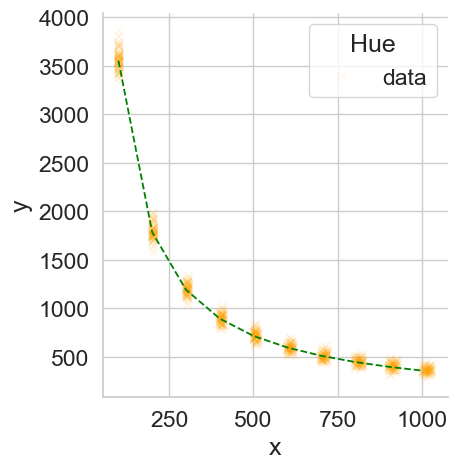

In [102]:
sns.relplot(data = df, kind="line", x = "x", y = "y", linestyle="dashed", color='green', linewidth=1.3)
sns.scatterplot(data=df1, x = "x", y = "y", style = "Hue", hue = "Hue", markers={"data": "x"}, palette={"data": "orange"}, alpha = 0.15)